In [1]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

In [2]:
CAPUCHIN_FILE = os.path.join('audio', 'Parsed_Capuchinbird_clips','XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join('audio','Parsed_Not_Capuchinbird_Clips','afternoon-birds-song-in-forest-0.wav')

In [3]:
print(CAPUCHIN_FILE) 

audio\Parsed_Capuchinbird_clips\XC3776-3.wav


In [4]:
# def load_wav_16k_mono(filename):

#     file_contents = tf.io.read_file(filename)

#     wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

#     wav = tf.squeeze(wav,axis=-1)
#     sample_rate = tf.cast(sample_rate, dtype=tf.int64)

#     if sample_rate != 16000:
#         import tensorflow_io as tfio
#         wav = tfio.audio.resample(
#             wav,
#             rate_in=sample_rate,
#             rate_out=16000
#         )
#     return wav

In [5]:
import librosa

def load_wav_16k_mono(filename):
    if isinstance(filename, tf.Tensor):
        filename = filename.numpy().decode('utf-8')
        
    wav, _ = librosa.load(filename, sr=16000, mono=True)
    return tf.convert_to_tensor(wav, dtype=tf.float32)

In [6]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

Plot

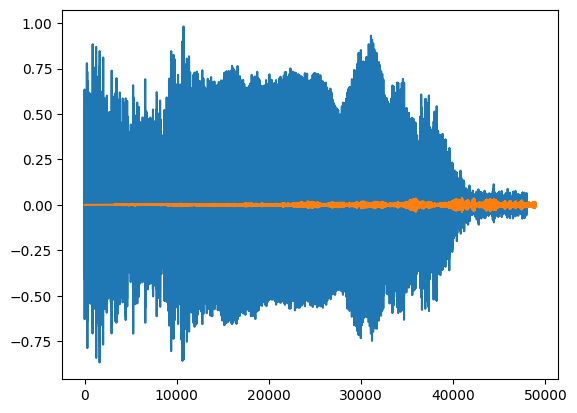

In [7]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

# Crete tensorflow dataset

define paths to positive and negative data

In [8]:
POS = os.path.join('audio', 'Parsed_Capuchinbird_clips')
NEG = os.path.join('audio', 'Parsed_Not_Capuchinbird_clips')

In [9]:
POS

'audio\\Parsed_Capuchinbird_clips'

Create tensorflow datasets

In [10]:
pos = tf.data.Dataset.list_files(POS+'\*.wav')
neg = tf.data.Dataset.list_files(NEG+'\*.wav')

In [11]:
pos.as_numpy_iterator().next()

b'audio\\Parsed_Capuchinbird_clips\\XC216010-3.wav'

Add labels and combine positive and negative samples

In [12]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [13]:
tf.ones(len(pos))

<tf.Tensor: shape=(217,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [14]:
tf.zeros(len(neg))

<tf.Tensor: shape=(593,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [15]:
negatives.as_numpy_iterator().next()

(b'audio\\Parsed_Not_Capuchinbird_clips\\cricket-sounds-for-sleep-26.wav',
 np.float32(0.0))

In [16]:
data.shuffle(10000).as_numpy_iterator().next()

(b'audio\\Parsed_Not_Capuchinbird_clips\\sparrow-sound-effect-48.wav',
 np.float32(0.0))

# Determine average length of a capuchin call

calculate wave cycle length

In [17]:
length = []
for file in os.listdir(os.path.join('audio','Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('audio','Parsed_Capuchinbird_Clips',file))
    length.append(len(tensor_wave))

In [18]:
# os.listdir(os.path.join('audio','Parsed_Capuchinbird_Clips'))

In [19]:
# length

In [20]:
tf.math.reduce_mean(length)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [21]:
tf.math.reduce_min(length)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [22]:
tf.math.reduce_max(length)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

# Convert into spectogram

In [23]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding,wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)

    label = tf.cast(label, tf.float32)
    return spectrogram, label

In [24]:
wav = load_wav_16k_mono(CAPUCHIN_FILE)
wav = wav[:48000]
zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
wav = tf.concat([zero_padding,wav],0)

In [25]:
wav

<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([-0.05156644,  0.10698242,  0.33992094, ...,  0.04074289,
       -0.00256476, -0.02162626], dtype=float32)>

In [26]:
spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
spectrogram = tf.abs(spectrogram)
spectrogram = tf.expand_dims(spectrogram, axis=2)

In [27]:
# spectrogram

In [28]:
filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [29]:
spectrogram, label = preprocess(filepath, label)

In [30]:
label

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [31]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[9.6400164e-04],
        [1.6356454e-03],
        [2.6366587e-03],
        ...,
        [2.0349760e-06],
        [2.2514905e-06],
        [3.6124839e-06]],

       [[7.2378793e-04],
        [1.5656999e-03],
        [2.5050344e-03],
        ...,
        [4.6018610e-07],
        [9.3083315e-07],
        [9.3190465e-07]],

       [[5.2450923e-05],
        [1.6381755e-03],
        [1.8897981e-03],
        ...,
        [5.9017060e-07],
        [1.9294985e-06],
        [1.6151462e-06]],

       ...,

       [[3.8391259e-04],
        [1.2984257e-03],
        [3.7277325e-03],
        ...,
        [6.3668563e-06],
        [9.2151040e-06],
        [1.8319115e-06]],

       [[8.5376203e-05],
        [1.5248798e-03],
        [3.7788269e-03],
        ...,
        [9.7628108e-06],
        [6.5373565e-06],
        [3.2745302e-06]],

       [[1.5425496e-05],
        [1.9091333e-03],
        [3.8285861e-03],
        ...,
        [1.3223235

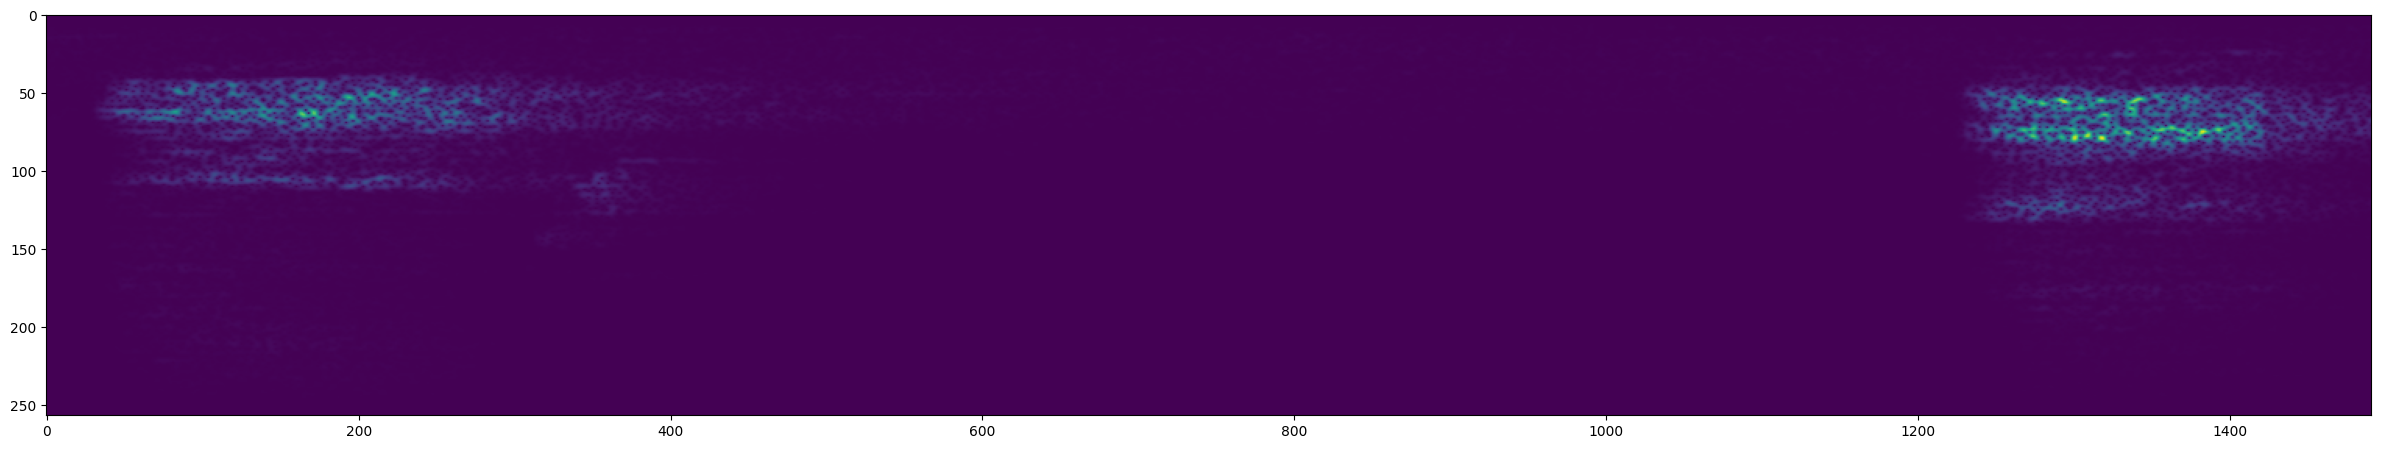

In [32]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# train test split

create a tensorflow data pipeline

In [33]:
def tf_preprocess(file_path, label):
    spectrogram, label = tf.py_function(
        func=preprocess,
        inp=[file_path, label],
        Tout=(tf.float32, tf.float32)  # or tf.string, depending on your label type
    )
    spectrogram.set_shape([None, None, 1])  # Set expected shape
    label.set_shape([])                     # Adjust as needed
    return spectrogram, label


In [34]:
# data = tf.data.Dataset.from_tensor_slices((file_paths, labels))
data = data.map(tf_preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

split

In [35]:
len(data)*.7

35.699999999999996

In [36]:
train = data.take(36)
test = data.skip(36).take(15)

one batch

In [37]:
samples, labels = train.as_numpy_iterator().next()

In [38]:
labels

array([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
      dtype=float32)

# Building dl model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [40]:
model = Sequential()
model.add(Conv2D(16,(3,3), activation='relu', input_shape=(1491,257,1)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\saumi\anaconda3\envs\audio\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 1489, 255, 16)  │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 1487, 253, 16)  │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6019376)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │   770,480,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 770,482,865 (2.87 GB)

 Trainable params: 770,482,865 (2.87 GB)

 Non-trainable params: 0 (0.00 B)